## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 5.5: All sky map of CII 158 micron emission from COBE

#### uses fits file downloaded from NASA Legacy Archive for Microwave Background Analysis (https://lambda.gsfc.nasa.gov/product/cobe/firas_lem_get.cfm)
#### and img_scale.py from https://www.astrobetter.com/wiki/RGB+Images+with+matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import img_scale
from scipy.interpolate import griddata
%matplotlib inline

In [4]:
# read in data and prepare for plotting
hdu = fits.open('FIRAS_LINE_EMISSION_MAP_HIGH.fits')

# get the CII line flux at each (l,b)
# figured this out by looking at the headers and playing around...
# LINFRQ6 =              1900.5  / [C II] line frequency, in GHz  

data = hdu[1].data
l = data['GAL_LON']
b = data['GAL_LAT']
f = data['LINE_FLU'][:,5]
f2 = data['LINE_FL2'][:,5]
f3 = data['LINE_FL3'][:,5]

# only use the regions with lower noise
good = f2 < 2
l = l[good]
b = b[good]
f = f[good]
#print(f.min(), f.max())

l_flip = l > 180
l[l_flip] = l[l_flip] - 360

# make into a regular grid
x, y = np.mgrid[-180:180:0.3, -60:60:0.3]
im = griddata((l,b), f, (x,y), method='cubic', fill_value=-100)
im = np.rot90(im, k=3)

img_scale : asinh


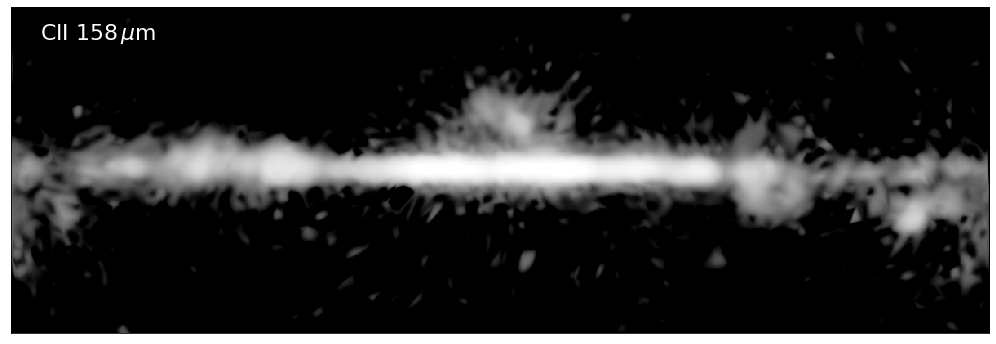

In [5]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)

ax.imshow(img_scale.asinh(im, scale_min=3.0, scale_max=150), origin='lower', cmap='Greys_r')
ax.text(0.03,0.9,r'CII $158\,\mu$m', {'color': 'w', 'fontsize': 22}, transform=ax.transAxes)

ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
plt.savefit('CII_allsky.pdf')